### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### -- Rafael Soares de Carvalho --

#### 1. Import the necessary packages - 2.5 marks

In [623]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set(color_codes=True)
%matplotlib inline 
import re
import numpy as np

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [624]:
# Import Data from local file to variables
Data  = pd.read_csv('Data.csv')
Item  = pd.read_csv('item.csv')
User  = pd.read_csv('user.csv')

In [625]:
#Check if Data is loaded.
Data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [626]:
#Check if Item is loaded.
Item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [627]:
#Check if User is loaded.
User.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [628]:
#Check Variable Types
print('Data Type is' , type(Data))
print('Item Type is' , type(Item))
print('User Type is' , type(User))

Data Type is <class 'pandas.core.frame.DataFrame'>
Item Type is <class 'pandas.core.frame.DataFrame'>
User Type is <class 'pandas.core.frame.DataFrame'>


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [629]:
# Database: Data
print('''
---------------------------------
Database: Data
---------------------------------''')

print('''
info:      ''')

print(Data.info)

print('''
---------------------------------
shape:      ''')

print(Data.shape)


print('''
---------------------------------
describe:      ''')

print(Data.describe())


---------------------------------
Database: Data
---------------------------------

info:      
<bound method DataFrame.info of        user id  movie id  rating  timestamp
0          196       242       3  881250949
1          186       302       3  891717742
2           22       377       1  878887116
3          244        51       2  880606923
4          166       346       1  886397596
...        ...       ...     ...        ...
99995      880       476       3  880175444
99996      716       204       5  879795543
99997      276      1090       1  874795795
99998       13       225       2  882399156
99999       12       203       3  879959583

[100000 rows x 4 columns]>

---------------------------------
shape:      
(100000, 4)

---------------------------------
describe:      
            user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       26

In [630]:
# Database: Item
print('''
---------------------------------
Database: Item
---------------------------------''')

print('''
info:      ''')

print(Item.info)

print('''
---------------------------------
shape:      ''')

print(Item.shape)


print('''
---------------------------------
describe:      ''')

print(Item.describe())


---------------------------------
Database: Item
---------------------------------

info:      
<bound method DataFrame.info of       movie id                          movie title release date  unknown  \
0            1                           Toy Story   01-Jan-1995        0   
1            2                           GoldenEye   01-Jan-1995        0   
2            3                          Four Rooms   01-Jan-1995        0   
3            4                          Get Shorty   01-Jan-1995        0   
4            5                             Copycat   01-Jan-1995        0   
...        ...                                  ...          ...      ...   
1676      1678                          Mat' i syn   06-Feb-1998        0   
1677      1679                           B. Monkey   06-Feb-1998        0   
1678      1680                       Sliding Doors   01-Jan-1998        0   
1679      1681                        You So Crazy   01-Jan-1994        0   
1680      1682  Scream o

In [631]:
# Database: User
print('''
---------------------------------
Database: User
---------------------------------''')

print('''
info:      ''')

print(User.info)

print('''
---------------------------------
shape:      ''')

print(User.shape)


print('''
---------------------------------
describe:      ''')

print(User.describe())


---------------------------------
Database: User
---------------------------------

info:      
<bound method DataFrame.info of      user id  age gender     occupation zip code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]>

---------------------------------
shape:      
(943, 5)

---------------------------------
describe:      
          user id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000


In [632]:
# Missing Values
print('''
Missing Values for each database:
-------------------------------------------''')
print('Database: Data')
print(pd.DataFrame(Data.isnull().sum(),columns= ['Number of missing values']))
print('Database: Item')
print(pd.DataFrame(Item.isnull().sum(),columns= ['Number of missing values']))
print('Database: User')
print(pd.DataFrame(User.isnull().sum(),columns= ['Number of missing values']))
print('''
Total Missing Values:
-------------------------------------------''')
print('MISSING VALUES ON DATABASE DATA',Data.isnull().sum().sum() )
print('MISSING VALUES ON DATABASE ITEM',Item.isnull().sum().sum() )
print('MISSING VALUES ON DATABASE USER',User.isnull().sum().sum() )


Missing Values for each database:
-------------------------------------------
Database: Data
           Number of missing values
user id                           0
movie id                          0
rating                            0
timestamp                         0
Database: Item
              Number of missing values
movie id                             0
movie title                          0
release date                         0
unknown                              0
Action                               0
Adventure                            0
Animation                            0
Childrens                            0
Comedy                               0
Crime                                0
Documentary                          0
Drama                                0
Fantasy                              0
Film-Noir                            0
Horror                               0
Musical                              0
Mystery                              0
Romance  

#### 4. Find the number of movies per genre using the item data - 5 marks

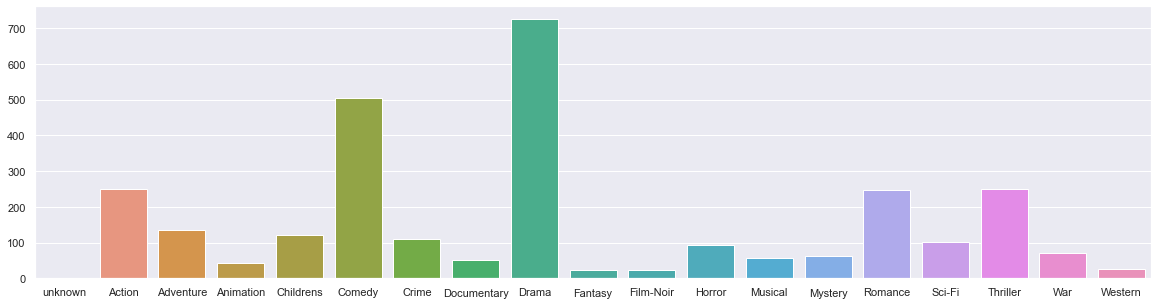

,Total
Drama,725
Comedy,505
Action,251
Thriller,251
Romance,247
Adventure,135
Childrens,122
Crime,109
Sci-Fi,101
Horror,92


In [633]:
# use sum on the default axis

genres = Item.columns[3:len(Item.columns)] #get collumns with genres only

#totalgenres = Item[genres].sum()
#print(totalgenres)

#plt.figure(figsize=(10,5)) # set the figure size
#plt.hist(Item,bins=100) #Plot the histogram
#plt.show()

plt.figure(figsize=(20,5))
sns.barplot(genres,Item[genres].sum());
plt.show();
DF_Genres = pd.DataFrame(Item[genres].sum())
#DF_Genres.rename (index ={1:"Genre"})
DF_Genres = DF_Genres.rename(columns={0: "Total"})
DF_Genres.sort_values(by="Total",ascending = False)

#### 5. Find the movies that have more than one genre - 2.5 marks

In [634]:
#hint: use sum on the axis = 1
genres = Item.columns[3:len(Item.columns)] #get collumns with genres only
NB_Genres = Item.groupby(["movie title"]).sum()[genres].sum(axis=1).sort_values(ascending=False).reset_index(name='Total Genres')
NB_Genres = NB_Genres[NB_Genres['Total Genres']>1]
NB_Genres

,movie title,Total Genres
0,That Darn Cat!,9
1,"Kid in King Arthur's Court, A",6
2,Body Snatchers,6
3,"Transformers: The Movie, The",6
4,Desperate Measures,6
...,...,...
843,Shine,2
844,"Object of My Affection, The",2
845,Once Were Warriors,2
846,Supercop,2


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [635]:

Item_wo_unknown = Item[Item['unknown']<1]
Item_wo_unknown

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

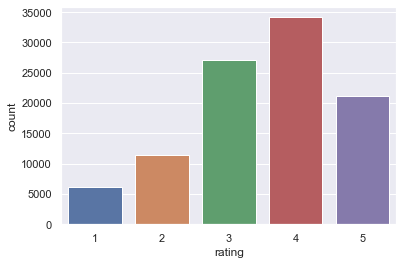

In [636]:
#your answers here
Data.head();
sns.countplot(Data['rating']);



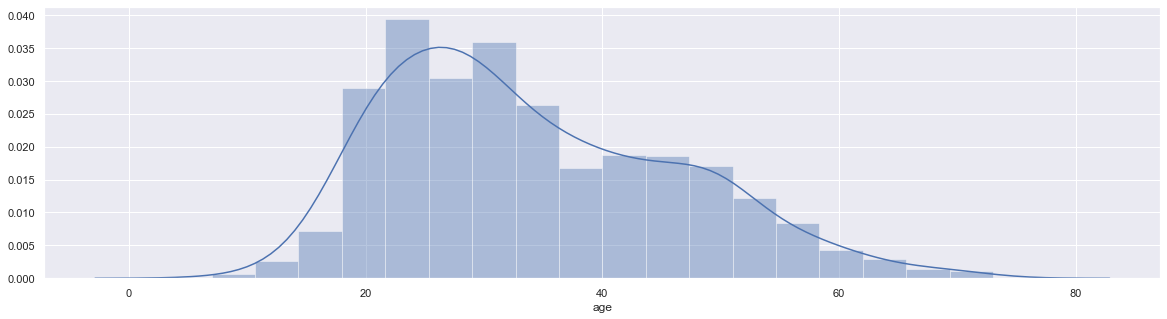

In [637]:
plt.figure(figsize=(20,5))
sns.distplot(User['age']);

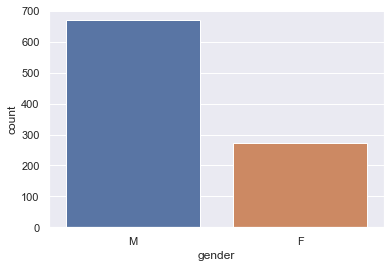

In [638]:
sns.countplot(User['gender']);

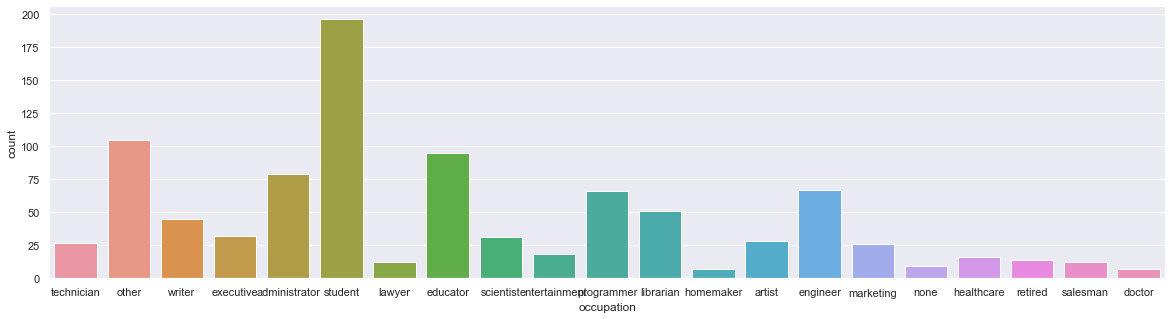

In [639]:
plt.figure(figsize=(20,5))
sns.countplot(User['occupation']);


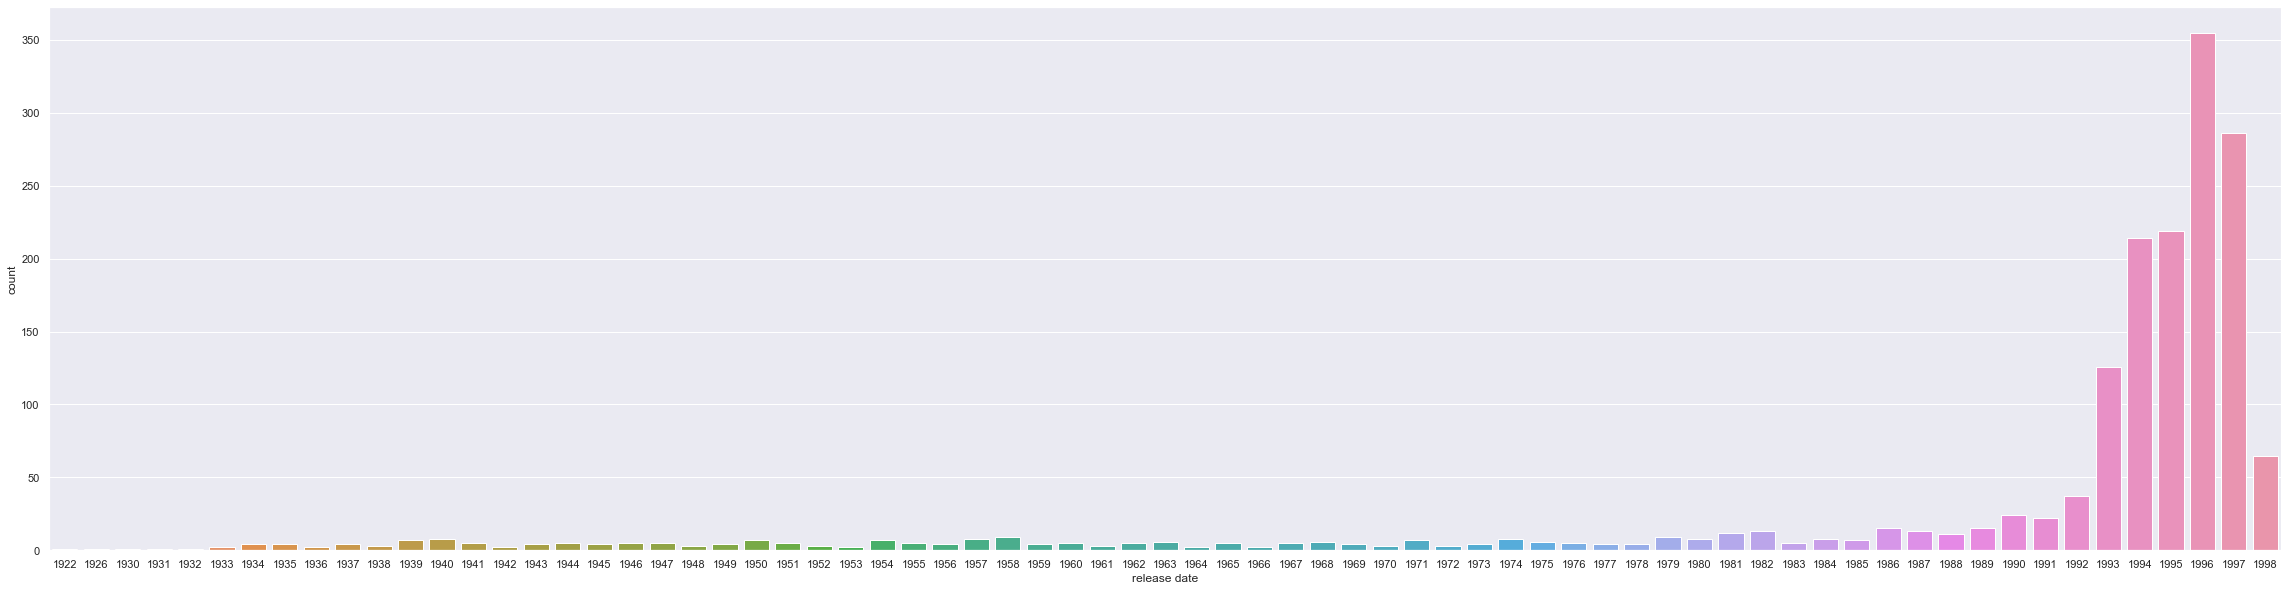

In [640]:
RealeaseYear = pd.DatetimeIndex(Item['release date']).year
plt.figure(figsize=(40,10))
sns.countplot(RealeaseYear);


### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

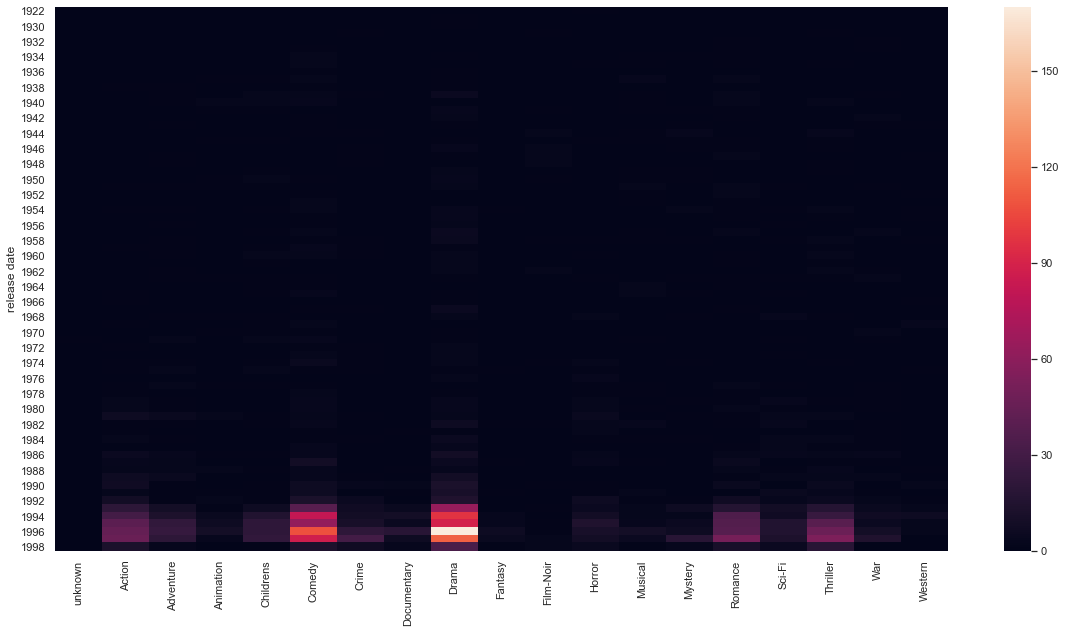

In [641]:
genres = Item.columns[3:len(Item.columns)] #get collumns with genres only
genre_year = Item.groupby([pd.DatetimeIndex(Item['release date']).year]).sum()[genres]

genre_year

plt.figure(figsize=(20,10))
sns.heatmap(genre_year)
plt.show()


### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [642]:
#movies = pd.DataFramea(Item['movie id', 'movie title'])
Ratings_per_movie = Data.groupby(['movie id']).count()['rating'].reset_index(name='Count Ratings')
AvgRating_per_movie = Data.groupby(['movie id']).mean()['rating'].reset_index(name='Avg Rating')
Titles = Item[{'movie id','movie title'}]

#sum(Data.duplicated()) # consistance of database Data - not duplicated

Movies_full = pd.merge(Ratings_per_movie,AvgRating_per_movie, on ='movie id')
Movies_full = pd.merge(Titles,Movies_full, on ='movie id')

Movies_full = Movies_full[Movies_full['Count Ratings']>100] # more than.. not more than or igual to.

Movies_full = Movies_full.sort_values(by='Avg Rating', ascending= False)

Movies_full = Movies_full[0:24]

Movies_full

,movie id,movie title,Count Ratings,Avg Rating
406,408,"Close Shave, A",112,4.491071
316,318,Schindler's List,298,4.466443
168,169,"Wrong Trousers, The",118,4.466102
481,483,Casablanca,243,4.456790
63,64,"Shawshank Redemption, The",283,4.445230
601,603,Rear Window,209,4.387560
11,12,"Usual Suspects, The",267,4.385768
49,50,Star Wars,583,4.358491
177,178,12 Angry Men,125,4.344000
133,134,Citizen Kane,198,4.292929


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [643]:
Gender_Ratings = pd.merge(Data,User, on ='user id')[['user id', 'movie id','gender']]
#Gender_Ratings
# sum(Gender_Ratings.duplicated()) -- data not duplicated
 
Males_per_movie = Gender_Ratings[Gender_Ratings['gender']== 'M']
Females_per_movie = Gender_Ratings[Gender_Ratings['gender']== 'F']


Males_per_movie = Males_per_movie.groupby(['movie id']).count()['gender'].reset_index(name='Males')
Females_per_movie = Females_per_movie.groupby(['movie id']).count()['gender'].reset_index(name='Females')

Movies_genders = pd.merge(Males_per_movie,Item, on ='movie id')
Movies_genders = pd.merge(Females_per_movie,Movies_genders, on ='movie id')
Movies_genders

#Drama
Drama = Movies_genders[Movies_genders['Drama']==1]
Drama_analyses = Drama.groupby(['Drama']).sum()[['Males','Females']]

Males_Drama = round(Drama_analyses['Males']/ (Drama_analyses['Females'] + Drama_analyses['Males'])*100,1)[1]

Females_Drama = round(Drama_analyses['Females']/ (Drama_analyses['Females'] + Drama_analyses['Males'])*100,1)[1]

print('Men watch more Drama than Women:',Males_Drama,'Males versus', Females_Drama ,'Females'  )

#Sci-Fi
SciFi = Movies_genders[Movies_genders['Sci-Fi']==1]
SciFi_analyses = SciFi.groupby(['Sci-Fi']).sum()[['Males','Females']]

Males_SciFi = round(SciFi_analyses['Males']/ (SciFi_analyses['Females'] + SciFi_analyses['Males'])*100,1)[1]

Females_SciFi= round(SciFi_analyses['Females']/ (SciFi_analyses['Females'] + SciFi_analyses['Males'])*100,1)[1]

print('Men watch more Sci-Fi than Women:',Males_SciFi,'Males versus', Females_SciFi ,'Females'  )

#Sci-Fi
Romance = Movies_genders[Movies_genders['Romance']==1]
Romance_analyses = Romance.groupby(['Romance']).sum()[['Males','Females']]

Males_Romance = round(Romance_analyses['Males']/ (Romance_analyses['Females'] + Romance_analyses['Males'])*100,1)[1]

Females_Romance= round(Romance_analyses['Females']/ (Romance_analyses['Females'] + Romance_analyses['Males'])*100,1)[1]

print('Men watch more Romance than Women:',Males_Romance,'Males versus', Females_Romance ,'Females'  )


Men watch more Drama than Women: 72.4 Males versus 27.6 Females
Men watch more Sci-Fi than Women: 79.3 Males versus 20.7 Females
Men watch more Romance than Women: 69.9 Males versus 30.1 Females
